## Домашняя работа по математической статистике
### Мартишевич Владислав, БЭК212

#### Задача 1
a) \
В первый день вероятность встретить нового такстиста $P_1 = 1$ \
Вероятность встретить нового такстиста два дня подряд $P_2 = 1 * \frac{n-1}{n}$ \
Три дня подряд $P_3 = 1 * \frac{n-1}{n} * \frac{n-2}{n}$ \
По такой логике, вероятность встречать нового такстиста $x - 1$ дней подряд: $$P_n (x, n)= \prod_{k = 0}^{x-2}\frac{n-k}{n}$$ \
Вероятность встретить того же таксиста, который уже приезжал, на $x$ день равна: $$P^*_n (x, n) = (\prod_{k = 0}^{x-2}\frac{n-k}{n}) * \frac{x-1}{n}$$ Это и будет функцией правдоподобия. Визуализируем ее при разных $n$ (очевидно, что $n \geq 9$) при $x = 10$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tqdm

In [3]:
n_list = np.arange(9, 100, 1)
func_list = []
for n in n_list:
    f = 1
    for k in range(9):
        f *= (n-k)/n
    f *= 9/n
    func_list.append(f)

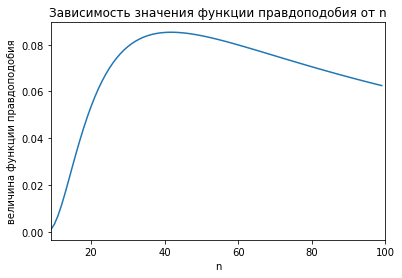

In [4]:
plt.plot(n_list, func_list)
plt.xlabel('n')
plt.ylabel('величина функции правдоподобия')
plt.title('Зависимость значения функции правдоподобия от n')
plt.xlim(9, 100)
plt.show()

Возьмем производную логарифмической функции правдоподобия при $x=10$: \
$$\frac{\partial{\ln{P^*_n}}}{\partial{n}} = -\frac{9}{\hat{n}_{ML}} + \sum_{k=0}^{8}\frac{1}{\hat{n}_{ML}-k} = 0$$
С помощью Wolfram находим решение уравнения, учитывая, что $n \geq 9$: $$\hat{n}_{ML} = 42$$

б) \
Матожидание номера заказа $x$, на котором происходит первый повторный приезд, можно рассчитать по формуле: \
$$\mathbb{E}_x = \sum_{i = 2}^{n+1} P^*_n(i, n)*i$$
, где $P^*_n(i, n)$ - функция правдоподобия для дня i (вероятность того, что повторный приезд случится на i-тый день). \
Визуализируем значение матожидания в зависимости от числа n:

In [5]:
ev_list = []
n_list = np.arange(9, 100, 1)
for n in n_list:
    ev = 0
    for i in range(2, n+2):
        f = 1
        for k in range(i-1):
            f *= (n-k)/n
        f *= (i-1)/n
        ev += i*f
    ev_list.append(ev)

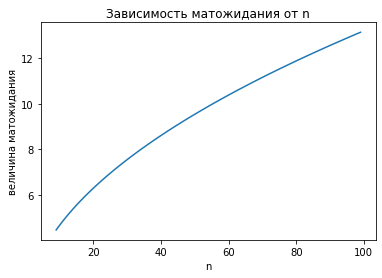

In [6]:
plt.plot(n_list, ev_list)
plt.xlabel('n')
plt.ylabel('величина матожидания')
plt.title('Зависимость матожидания от n')
plt.show()

Оценка методом моментов:
$$\sum_{i = 2}^{\hat{n}_{MM}+1} P^*_n(i, \hat{n}_{MM})*i = 10$$ \
Решим численно: 

In [7]:
diff_list = []
for n in n_list:
    ev = 0
    for i in range(2, n+2):
        f = 1
        for k in range(i-1):
            f *= (n-k)/n
        f *= (i-1)/n
        ev += i*f
    diff_list.append(abs(10-ev))
n_list[np.argmin(diff_list)]

55

Получается, что 
$$\hat{n}_{MM} = 55$$

в) \
Пусть $n = 100$. Просимулируем вызовы такси, сохраняя номера заказов с первым повторным приездом:

In [10]:
taxis_number = np.arange(100)
x_list = []
np.random.seed(0)
for i in range(10000):
    new = True
    choice_list = []
    day = 0
    while new == True:
        choice = np.random.choice(taxis_number)
        if choice not in choice_list:
            choice_list.append(choice)
            day += 1
        else:
            new = False
            day += 1
            x_list.append(day)

Найдем оценки методом моментов (численно) для каждого случая из симуляции:

In [11]:
mm_list = []
for x in tqdm.tqdm(x_list):
    ev_min = 100
    n = x-1
    min_kat = True
    while min_kat == True:
        ev = 0
        for i in range(2, n+2):
            f = 1
            for k in range(i-1):
                f *= (n-k)/n
            f *= (i-1)/n
            ev += i*f
        ev_dif = abs(x-ev)
        if ev_min > ev_dif:
            ev_min = ev_dif
            n += 1
        else:
            mm_list.append(n-1)
            min_kat = False

100%|█████████████████████████████████████| 10000/10000 [41:27<00:00,  4.02it/s]


Найдем оценки методом максимального правдоподобия (численно) для каждого случая из симуляции:

In [12]:
ml_list = []
for x in tqdm.tqdm(x_list):
    n_list = np.arange(x-1, 1000, 1)
    func_list = []
    for n in n_list:
        f = 1
        for k in range(x-1):
            f *= (n-k)/n
        f *= (x-1)/n
        func_list.append(f)
    ml_list.append(n_list[np.argmax(func_list)])

100%|████████████████████████████████████| 10000/10000 [00:49<00:00, 203.68it/s]


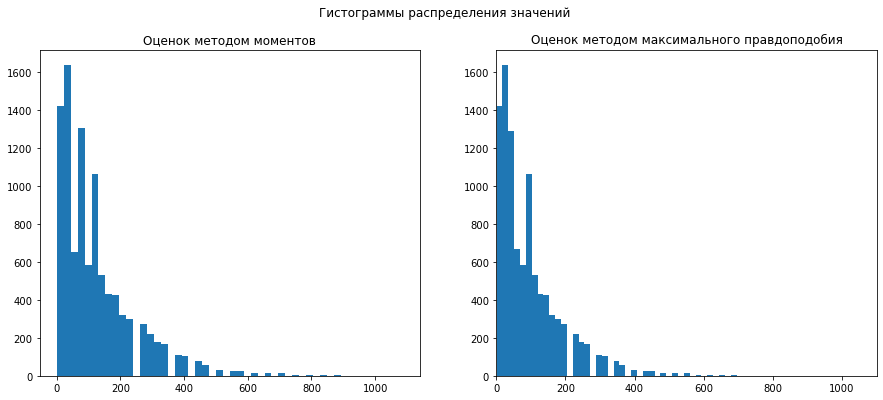

In [13]:
figure, axis = plt.subplots(1, 2, figsize = (15, 6))

axis[0].hist(mm_list, bins = 50)
axis[0].set_title('Оценок методом моментов')

axis[1].hist(ml_list, bins = 50)
axis[1].set_title('Оценок методом максимального правдоподобия')

plt.xlim(0,1100)
figure.suptitle('Гистограммы распределения значений')

plt.show()

Рассчитаем смещение, как $b = \mathbb{E}_{\hat{n}} - n$, где $n = 100$.

Для оценок методом моментов $b_{MM} = \mathbb{E}_{\hat{n}_{MM}} - 100$

In [14]:
np.mean(mm_list) - 100

25.395700000000005

Для оценок методом максимального правдоподобия $b_{ML} = \mathbb{E}_{\hat{n}_{ML}} - 100$

In [15]:
np.mean(ml_list) - 100

-3.8623000000000047

Далее, найдем дисперсию как $\sigma^2 = \frac{1}{N-1}\sum_{i=1}^{N}(\hat{n}_{i}-\mathbb{E}_{\hat{n}})^2$, где $N=10000$

Для оценок методом моментов $\sigma^2_{MM} = \frac{1}{N-1}\sum_{i=1}^{N}({\hat{n}_{MM}}_{i}-\mathbb{E}_{\hat{n}})^2$, где $N=10000$

In [16]:
np.array(mm_list).var(ddof=1)

14266.849206430643

Для оценок методом максимального правдоподобия $\sigma^2_{ML} = \frac{1}{N-1}\sum_{i=1}^{N}({\hat{n}_{ML}}_{i}-\mathbb{E}_{\hat{n}})^2$, где $N=10000$

In [17]:
np.array(ml_list).var(ddof=1)

8612.57779648965

Далее, найдем среднеквадратичную ошибку как $MSE = \frac{1}{N}\sum_{i=1}^{N}(\hat{n}_{i}-n^*)^2$, где $N=10000$, $n^*=100$.

Для оценок методом моментов $MSE_{MM} = \frac{1}{N}\sum_{i=1}^{N}({\hat{n}_{MM}}_{i}-n^*)^2$, где $N=10000$, $n^*=100$.

In [18]:
mse_mm = ((np.array(mm_list) - 100)**2).sum()/10000
mse_mm

14910.3641

Для оценок методом моментов $MSE_{ML} = \frac{1}{N}\sum_{i=1}^{N}({\hat{n}_{ML}}_{i}-n^*)^2$, где $N=10000$, $n^*=100$.

In [19]:
mse_ml = ((np.array(ml_list) - 100)**2).sum()/10000
mse_ml

8626.6339

#### Задача 2

а) \
Для начала, стоит сделать вывод, что $x$ разных имен у таксистов означает, что турист $x (x\leq10)$ из 10 дней встречал таксистов с новыми именами. \
Рассмотрим, чему будет равна вероятность встретить $x$ разных имен у таксистов за 10 дней в нескольких частных случаях:
- Если 6 уникальных имен встречались первые 6 дней: $$P_1 = 1*\frac{n-1}{n}*\frac{n-2}{n}*\frac{n-3}{n}*\frac{n-4}{n}*\frac{n-5}{n}*\frac{6}{n}*\frac{6}{n}*\frac{6}{n}*\frac{6}{n}$$
- Обобщим это для первых $x$ дней: $$P_1(x) = \prod_{i=0}^{x-1}\frac{n-i}{n}*(\frac{x}{n})^{10-x}$$
- Если 1 уникальное имена встретилось в первый день, а остальные 5 - в последние 5: $$P_2 = 1*\frac{1}{n}*\frac{1}{n}*\frac{1}{n}*\frac{1}{n}*\frac{n-1}{n}*\frac{n-2}{n}*\frac{n-3}{n}*\frac{n-4}{n}*\frac{n-5}{n}$$
- Обобщим этот случай для $x$ имен: $$P_2(x) = \prod_{i=0}^{x-1}\frac{n-i}{n}*(\frac{1}{n})^{10-x}$$
- Если неукинальные имена(в случае 4 неуникальных имен) встречались через день: $$P_3 = 1*\frac{1}{n}*\frac{n-1}{n}*\frac{2}{n}*\frac{n-2}{n}*\frac{3}{n}*\frac{n-3}{n}*\frac{4}{n}*\frac{n-4}{n}*\frac{n-5}{n}$$
- Обобщим этот случай для $x$ имен: $$P_3(x) = \prod_{i=0}^{x-1}\frac{n-i}{n}*\prod_{j=1}^{10-x}\frac{j}{n}$$
Проведя такие незамысловатые ходы, можно заметить, что изменяться будут только числа, записанные в числителе вероятностей, ответственных за выпадение неуникальных имен. Например, в случае с 6 именами, в первом случае это $6*6*6*6$, во втором $1*1*1*1$, в третьем $1*2*3*4$. Держа в голове этот вывод, запишем вероятность в общем виде:
- Для случая с 6 уникальными именами: $$P^* = \prod_{i=0}^{5}\frac{n-i}{n}*\frac{C}{n^4}$$
, где C - сумма всех таких умножений (их будет $C^4_6=126$), показывающих расположение дней, когда встречались неуникальные имена. Это будет сумма вида: $1*1*1*1+1*1*1*2+1*1*1*3+...+5*5*5*6+5*6*6*6+6*6*6*6$ (то есть у нас есть ограничение, что каждый предыдущий множитель каждого слагаемого не должен превышать следующий). Посчитаем значение C с помощью кода:

In [20]:
C = 0
for i in range(1, 7):
    for j in range(1, 7):
        for k in range(1, 7):
            for s in range(1, 7):
                if i <= j and j <= k and k <= s:
                    C += i * j * k * s
C

22827

Таким образом, функция правдоподобия для 6 уникальных имен имеет вид: $$P^* = \prod_{i=0}^{5}\frac{n-i}{n}*\frac{22827}{n^4}$$

Визуализируем эту функцию правдоподобия при разных $n(n \geq 6)$:

In [21]:
n2_list = np.arange(6, 101, 1)
func2_list = []
for n in n2_list:
    f = 1
    for i in range(1, 6):
        f *= (n - i)/n
    f *= 22827/n**4
    func2_list.append(f)

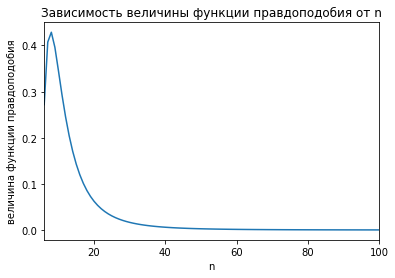

In [23]:
plt.plot(n2_list, func2_list)
plt.xlabel('n')
plt.ylabel('величина функции правдоподобия')
plt.title('Зависимость величины функции правдоподобия от n')
plt.xlim(6, 100)
plt.show()

Численно найдем оценку максимального правдоподобия:

In [24]:
n2_list[np.argmax(func2_list)]

8

Таким образом, $\hat{n}_{ML} = 8$.

б) \
Для начала, запишем вероятность встретить $x$ уникальных имен за 10 вызовов в общем виде: $$P^*(x) = \prod_{i=0}^{x-1}\frac{n-i}{n}*\frac{C(x)}{n^{10-x}}$$, где $C(x)$ находится по аналогии со случаем с 6 уникальными именами. 
Тогда, матожидание количества уникальных имен $x$ будет иметь формулу: $$\mathbb{E}_{x} = \sum_{i=1}^{10}P^*(i)*i$$

Для дальнейшего подсчета матожиданий и использования метода моментов, посчитаем значение этой константы для каждого $x(x\leq10)$:

In [25]:
c_list = [] #список для констант

$x = 1$, тогда нам попадается уникальное имя первый раз, а следующие разы мы встречаем его же. $C(1) = 1$.

In [26]:
c_list.append(1)

$x = 2$:

In [27]:
C_2 = 0
for i in range(1, 3):
    for i2 in range(1, 3):
        for i3 in range(1, 3):
            for i4 in range(1, 3):
                for i5 in range(1, 3):
                    for i6 in range(1, 3):
                        for i7 in range(1, 3):
                            for i8 in range(1,3):
                                if i <= i2 and i2 <= i3 and i3 <= i4 and i4 <= i5 and i5 <= i6 and i6 <= i7 and i7 <= i8:
                                    C_2 += i*i2*i3*i4*i5*i6*i7*i8
c_list.append(C_2)

$x = 3:$

In [28]:
C_3 = 0
for i in range(1, 4):
    for i2 in range(1, 4):
        for i3 in range(1, 4):
            for i4 in range(1, 4):
                for i5 in range(1, 4):
                    for i6 in range(1, 4):
                        for i7 in range(1, 4):
                            if i <= i2 and i2 <= i3 and i3 <= i4 and i4 <= i5 and i5 <= i6 and i6 <= i7:
                                C_3 += i*i2*i3*i4*i5*i6*i7
c_list.append(C_3)

$x = 4:$

In [29]:
C_4 = 0
for i in range(1, 5):
    for i2 in range(1, 5):
        for i3 in range(1, 5):
            for i4 in range(1, 5):
                for i5 in range(1, 5):
                    for i6 in range(1, 5):
                        if i <= i2 and i2 <= i3 and i3 <= i4 and i4 <= i5 and i5 <= i6:
                            C_4 += i*i2*i3*i4*i5*i6
c_list.append(C_4)

$x = 5:$

In [30]:
C_5 = 0
for i in range(1, 6):
    for i2 in range(1, 6):
        for i3 in range(1, 6):
            for i4 in range(1, 6):
                for i5 in range(1, 6):
                    if i <= i2 and i2 <= i3 and i3 <= i4 and i4 <= i5:
                        C_5 += i*i2*i3*i4*i5
c_list.append(C_5)

$x = 6:$

In [31]:
C_6 = 0
for i in range(1, 7):
    for i2 in range(1, 7):
        for i3 in range(1, 7):
            for i4 in range(1, 7):
                if i <= i2 and i2 <= i3 and i3 <= i4:
                    C_6 += i*i2*i3*i4
c_list.append(C_6)

$x = 7:$

In [32]:
C_7 = 0
for i in range(1, 8):
    for i2 in range(1, 8):
        for i3 in range(1, 8):
                if i <= i2 and i2 <= i3:
                    C_7 += i*i2*i3
c_list.append(C_7)

$x = 8:$

In [33]:
C_8 = 0
for i in range(1, 9):
    for i2 in range(1, 9):
                if i <= i2:
                    C_8 += i*i2
c_list.append(C_8)

$x = 9$:

In [34]:
C_9 = 0
for i in range(1, 10):
    C_9 += i
c_list.append(C_9)

$x = 10$: В этом случае объявим константу равной 1, чтобы не занулить вероятность

In [35]:
c_list.append(1)

Посмотрим на получившиеся константы:

In [36]:
print(*c_list)

1 511 9330 34105 42525 22827 5880 750 45 1


Визуализируем матожидания в зависимости от разных n:

In [37]:
ev2_list = []
for n in range(1, 500):
    ev = 0
    for i in range(1, min(n+1, 11)):
        f = 1
        for j in range(0, i):
            f *= (n - j)/n
        f *= c_list[i-1]/n**(10-i)
        ev += i*f
    ev2_list.append(ev)

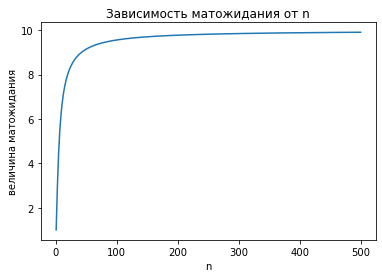

In [39]:
plt.plot(np.arange(1, 500), ev2_list)
plt.xlabel('n')
plt.ylabel('величина матожидания')
plt.title('Зависимость матожидания от n')
plt.show()

Оценка методом моментов: $$\mathbb{E}_{x} = \sum_{i=1}^{10}P^*(i, \hat{n}_{MM})*i = 6$$

Найдем ее численно:

In [40]:
n = 1
min_dif = True
dif = 100
while min_dif == True:
    ev = 0
    for i in range(1, min(n+1, 11)):
        f = 1
        for j in range(0, i):
            f *= (n - j)/n
        f *= c_list[i-1]/n**(10-i)
        ev += i*f
    dif_1 = abs(ev-6)
    if dif > dif_1:
        dif = dif_1
        n += 1
    else:
        n_mm = n - 1
        min_dif = False
n_mm

8

Тогда оценка методом моментов: $$\hat{n}_{MM}=8$$

в) \
Проведем 10000 симуляций 10 вызовов такси при $n = 20$, сохраняя количество уникальных имен:

In [41]:
taxi_names = np.arange(0, 20, 1)
x1_list = []
np.random.seed(0)
for i in range(10000):
    names = np.random.choice(taxi_names, 10)
    x1_list.append(len(np.unique(names)))

Найдем оценки методом моментов (численно) для каждого случая из симуляции:

In [42]:
mm1_list = []
for x in tqdm.tqdm(x1_list):
    if x == 10:
        mm1_list.append(100)
    else:
        n = 1
        min_dif = True
        dif = 100
        while min_dif == True:
            ev = 0
            for i in range(1, min(n+1, 11)):
                f = 1
                for j in range(0, i):
                    f *= (n - j)/n
                f *= c_list[i-1]/n**(10-i)
                ev += i*f
            dif_1 = abs(ev-x)
            if dif > dif_1:
                dif = dif_1
                n += 1
            else:
                n_mm = n - 1
                min_dif = False
        mm1_list.append(n_mm)

100%|███████████████████████████████████| 10000/10000 [00:03<00:00, 3112.43it/s]


Найдем оценки методом максимального правдоподобия (численно) для каждого случая из симуляции:

In [43]:
ml1_list = []
for x in tqdm.tqdm(x1_list):
    if x == 10:
        ml1_list.append(100)
    else:
        n2_list = np.arange(1, 1000, 1)
        func_list = []
        for n in n2_list:
            f = 1
            for i in range(1, x):
                f *= (n - i)/n
            f *= c_list[i-1]/n**(10-x)
            func_list.append(f)
        ml1_list.append(n2_list[np.argmax(func_list)])

100%|████████████████████████████████████| 10000/10000 [00:32<00:00, 306.09it/s]


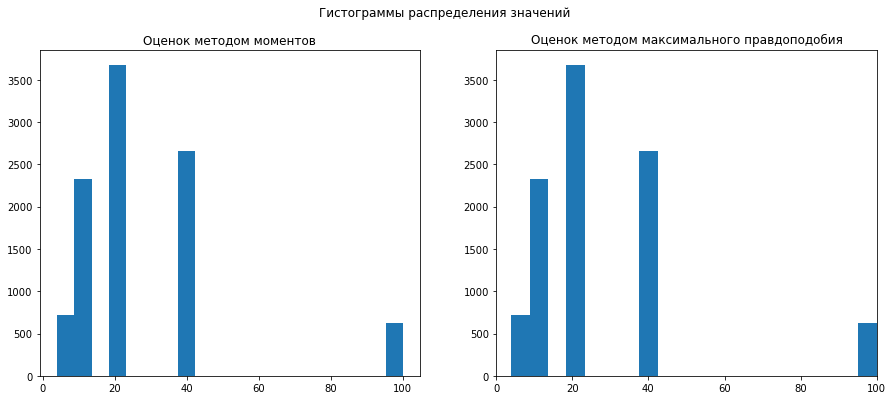

In [44]:
figure, axis = plt.subplots(1, 2, figsize = (15, 6))

axis[0].hist(mm1_list, bins=20)
axis[0].set_title('Оценок методом моментов')

axis[1].hist(ml1_list, bins=20)
axis[1].set_title('Оценок методом максимального правдоподобия')

plt.xlim(0,100)
figure.suptitle('Гистограммы распределения значений')

plt.show()

Рассчитаем смещение, как $b = \mathbb{E}_{\hat{n}} - n$, где $n = 20$.

Смещение для оценки методом моментов будет равно $b_{MM} = \mathbb{E}_{\hat{n}_{MM}} - 20$.

In [45]:
np.mean(mm1_list) - 20

8.0778

Смещение для оценки методом моментов будет равно $b_{ML} = \mathbb{E}_{\hat{n}_{ML}} - 20$.

In [46]:
np.mean(ml1_list) - 20

7.704000000000001

Далее, найдем дисперсию как $\sigma^2 = \frac{1}{N-1}\sum_{i=1}^{N}(\hat{n}_{i}-\mathbb{E}_{\hat{n}})^2$, где $N=10000$

Для оценок методом моментов $\sigma^2_{MM} = \frac{1}{N-1}\sum_{i=1}^{N}({\hat{n}_{MM}}_{i}-\mathbb{E}_{\hat{n}})^2$, где $N=10000$.

In [47]:
np.array(mm1_list).var(ddof=1)

487.5855057105711

Для оценок методом максимального правдоподобия $\sigma^2_{ML} = \frac{1}{N-1}\sum_{i=1}^{N}({\hat{n}_{ML}}_{i}-\mathbb{E}_{\hat{n}})^2$, где $N=10000$.

In [48]:
np.array(ml1_list).var(ddof=1)

494.0383878387839

Далее, найдем среднеквадратичную ошибку как $MSE = \frac{1}{N}\sum_{i=1}^{N}(\hat{n}_{i}-n^*)^2$, где $N=10000$, $n^*=20$.

Для оценок методом моментов $MSE_{MM} = \frac{1}{N}\sum_{i=1}^{N}({\hat{n}_{MM}}_{i}-n^*)^2$, где $N=10000$, $n^*=20$.

In [49]:
mse_mm1 = ((np.array(mm1_list) - 20)**2).sum()/10000
mse_mm1

552.7876

Для оценок методом моментов $MSE_{ML} = \frac{1}{N}\sum_{i=1}^{N}({\hat{n}_{ML}}_{i}-n^*)^2$, где $N=10000$, $n^*=20$.

In [50]:
mse_ml1 = ((np.array(ml1_list) - 20)**2).sum()/10000
mse_ml1

553.3406

#### Задача 3

а) \
Сгенерируем 10000 симуляций из 20 наблюдений из экспоненциального распределения с интенсивностью 1:

In [51]:
from scipy.stats import expon

In [52]:
a = []
np.random.seed(0)
for i in range(10000):
    sim = expon.rvs(scale = 1,  size = 20)
    a.append(sim)

Для начала построим классические асимптотически нормальные интервалы: $$\frac{\bar{X}-\mu_{X}}{\sigma_{X}/\sqrt{n}} \overset{as}\sim N(0, 1)$$
Тогда 95%-й интервал выглядит следующим образом: $$[\bar{X} - z_{0.975}*\frac{\sigma_X}{\sqrt{n}};\bar{X} + z_{0.975}*\frac{\sigma_X}{\sqrt{n}}]$$
Построим 10000 интервалов:

In [53]:
from scipy.stats import norm
z_crit = norm.ppf(0.975)
z_crit

1.959963984540054

In [54]:
int_list = []
for sim in a:
    X_mean = np.mean(sim)
    X_sigma = np.sqrt(sim.var(ddof=1))
    lower_bound = X_mean - (z_crit*X_sigma)/np.sqrt(20)
    upper_bound = X_mean + (z_crit*X_sigma)/np.sqrt(20)
    int_list.append((lower_bound, upper_bound))

Посчитаем вероятность того, что интервал накрывает фактическое матожидание ($\mathbb{E}_X = \frac{1}{\lambda} = 1$):

In [55]:
k = 0
for inter in int_list:
    if inter[0] <=1 and inter[1] >= 1:
        k += 1
p1 = k/10000
p1

0.906

Построим 10000 интервалов с помощью наивного бутстрэпа (каждый на 10000 бутстрэп-выборок):

In [56]:
int1_list = []
np.random.seed(0)
for sim in tqdm.tqdm(a):
    c = np.random.choice(sim, (10000, 20))
    xmean = c.mean(axis=1)
    lower_bound = np.percentile(xmean, q=2.5)
    upper_bound = np.percentile(xmean, q=97.5)
    int1_list.append((lower_bound, upper_bound))

100%|████████████████████████████████████| 10000/10000 [00:34<00:00, 285.82it/s]


Посчитаем вероятность того, что интервал накрывает фактическое матожидание ($\mathbb{E}_X = \frac{1}{\lambda} = 1$): 

In [57]:
k = 0
for inter in int1_list:
    if inter[0] <=1 and inter[1] >= 1:
        k += 1
p2 = k/10000
p2

0.9051

Построим 10000 интервалов с помощью бутстрэпа $t$-статистики:

In [58]:
int2_list = []
np.random.seed(0)
for sim in tqdm.tqdm(a):
    c = np.random.choice(sim, (10000, 20))
    tstat = (c.mean(axis=1) - np.mean(sim))/(np.sqrt(c.var(axis=1, ddof=1))/np.sqrt(20))
    q_l = np.percentile(tstat, q=2.5)
    q_r = np.percentile(tstat, q=97.5)
    lower_bound = np.mean(sim) - (q_r*np.sqrt(sim.var(ddof=1)))/np.sqrt(20)
    upper_bound = np.mean(sim) - (q_l*np.sqrt(sim.var(ddof=1)))/np.sqrt(20)
    int2_list.append((lower_bound, upper_bound))

100%|████████████████████████████████████| 10000/10000 [00:44<00:00, 226.34it/s]


Посчитаем вероятность того, что интервал накрывает фактическое матожидание ($\mathbb{E}_X = \frac{1}{\lambda} = 1$): 

In [59]:
k = 0
for inter in int2_list:
    if inter[0] <=1 and inter[1] >= 1:
        k += 1
p3 = k/10000
p3

0.9451

б) \
Сгенерируем 10000 симуляций из 20 наблюдений из распределения Стьюдента с тремя степенями свободы:

In [60]:
from scipy.stats import t

In [61]:
b = []
np.random.seed(0)
for i in range(10000):
    sim = t.rvs(df=3, size=20)
    b.append(sim)

Для начала построим классические асимптотически нормальные интервалы:

In [62]:
intt_list = []
for sim in b:
    X_mean = np.mean(sim)
    X_sigma = np.sqrt(sim.var(ddof=1))
    lower_bound = X_mean - (z_crit*X_sigma)/np.sqrt(20)
    upper_bound = X_mean + (z_crit*X_sigma)/np.sqrt(20)
    intt_list.append((lower_bound, upper_bound))

Посчитаем вероятность того, что интервал накрывает фактическое матожидание ($\mathbb{E}_X = 0$):

In [63]:
k = 0
for inter in intt_list:
    if inter[0] <=0 and inter[1] >= 0:
        k += 1
p1 = k/10000
p1

0.9421

Построим 10000 интервалов с помощью наивного бутстрэпа (каждый на 10000 бутстрэп-выборок):

In [64]:
intt1_list = []
np.random.seed(0)
for sim in tqdm.tqdm(b):
    c = np.random.choice(sim, (10000, 20))
    xmean = c.mean(axis=1)
    lower_bound = np.percentile(xmean, q=2.5)
    upper_bound = np.percentile(xmean, q=97.5)
    intt1_list.append((lower_bound, upper_bound))

100%|████████████████████████████████████| 10000/10000 [00:34<00:00, 288.81it/s]


Посчитаем вероятность того, что интервал накрывает фактическое матожидание ($\mathbb{E}_X = 0$):

In [65]:
k = 0
for inter in intt1_list:
    if inter[0] <=0 and inter[1] >= 0:
        k += 1
p2 = k/10000
p2

0.9231

Построим 10000 интервалов с помощью бутстрэпа $t$-статистики:

In [66]:
intt2_list = []
np.random.seed(0)
for sim in tqdm.tqdm(b):
    c = np.random.choice(sim, (10000, 20))
    tstat = (c.mean(axis=1) - np.mean(sim))/(np.sqrt(c.var(axis=1, ddof=1))/np.sqrt(20))
    q_l = np.percentile(tstat, q=2.5)
    q_r = np.percentile(tstat, q=97.5)
    lower_bound = np.mean(sim) - (q_r*np.sqrt(sim.var(ddof=1)))/np.sqrt(20)
    upper_bound = np.mean(sim) - (q_l*np.sqrt(sim.var(ddof=1)))/np.sqrt(20)
    intt2_list.append((lower_bound, upper_bound))

100%|████████████████████████████████████| 10000/10000 [00:46<00:00, 214.97it/s]


Посчитаем вероятность того, что интервал накрывает фактическое матожидание ($\mathbb{E}_X = 0$):

In [67]:
k = 0
for inter in intt2_list:
    if inter[0] <=0 and inter[1] >= 0:
        k += 1
p3 = k/10000
p3

0.9259

в) \
В пунктах а) и б) разные способы показали наилучшие результаты. В случае экспоненциального распределения лучшим оказался бутстрап $t$-статистики, оценка вероятности фактически накрыть матожидание равняется 0.9451. В случае распределения Стьюдента лучше всего показал себя классический асимптотический нормальный интервал, оценка вероятности фактически накрыть матожидание равняется 0.9421. Можно сделать вывод, что классические интервалы лучше работают с распределениями, похожими на нормальное, а в других случаях лучше работает бутстрап.

#### Задача 4

Подгрузим таблицу с оценками:

In [68]:
df = pd.read_csv('marks.csv')

In [69]:
df.head(10)

,num,Last name,Name,Mail,info_1,info_2,info_3,bpip,prepod,Вариант,...,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,NaN,NaN,Желтый,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Голубой,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14.0
2,NaN,NaN,Зеленый,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,21.0
3,NaN,NaN,Оранжевый,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,11.0,33.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,14.0,40.0
5,1,Репенкова,Полина Александровна,parepenkova@edu.hse.ru,351118027,3668903494,NaN,ип,Демешев,4.0,...,NaN,16.0,NaN,16,4,NaN,NaN,5.0,17.0,61.0
6,2,Ролдугина,Софья Александровна,saroldugina@edu.hse.ru,351118027,1705654528,NaN,ип,Демешев,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,6.0,20.0,45.0
7,3,Сафина,Алия Линаровна,alsafina@edu.hse.ru,351118027,5096071996,NaN,ип,Демешев,3.0,...,NaN,19.0,NaN,19,5,NaN,NaN,7.0,23.0,38.0
8,4,Сидоров,Иван Максимович,imsidorov@edu.hse.ru,351118027,4361493219,NaN,ип,Демешев,4.0,...,NaN,26.0,NaN,26,8,NaN,NaN,8.0,25.0,24.0
9,5,Солоухин,Иван Владимирович,ivsoloukhin@edu.hse.ru,351118027,1705636488,NaN,ип,Демешев,4.0,...,NaN,21.0,NaN,21,6,NaN,NaN,9.0,27.0,16.0


Возьмем нужные нам данные:

In [70]:
df_surnames = np.array(df[(df['Last name'].isna() == False)]['Last name']) #вектор фамилий
df_marks = np.array(df[(df['Last name'].isna() == False)]['Unnamed: 72']) #вектор оценок

Разделим на оценки людей с первой гласной и согласной буквой:

In [71]:
glasn = {'У', 'Е', 'Ы', 'А', 'О', 'Э', 'Ё', 'Я', 'И', 'Ю'}
X = [] #список оценок людей, у которых фамилия на гласную
Y = [] #список оценок людей, у которых фамилия на согласную
for i in range(len(df_surnames)):
    if df_surnames[i][0] in glasn:
        X.append(df_marks[i])
    else:
        Y.append(df_marks[i])
X = np.array(X)
Y = np.array(Y)

In [72]:
X.shape

(49,)

In [73]:
Y.shape

(283,)

В этой задаче во всех пунктах тестируется следующая гипотеза:
$$H_0: \mu_X = \mu_Y$$
$$H_A: \mu_X \not= \mu_Y$$
, где $\mu_X$ - матожидание результатов экзамена для тех, у кого фамилия начинается с гласной буквы, $\mu_Y$ - матожидание результатов для тех, у кого фамилия на согласную.

а) \
Проведем тест Уэлча:

In [74]:
from scipy.stats import ttest_ind

In [75]:
ttest_ind(X, Y, equal_var = False)

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3974027153843839)

Получаем $p-value = 0.397$. Таким образом, на уровне значимости $\alpha = 0.05$ гипотеза о равенстве не отвергается.

б) \
Используем наивный бутстрэп:

In [76]:
np.random.seed(0)
X_boot = np.random.choice(X, (10000, 49))
Y_boot = np.random.choice(Y, (10000, 283))
X_mean = X_boot.mean(axis=1)
Y_mean = Y_boot.mean(axis=1)
deltha = X_mean-Y_mean

Таким образом, deltha - бутстрап-выборка различий средних за экзамен среди людей с фамилиями на гласную и согласную. Проверим гипотезу о равенстве, т.е. посмотрим, входит ли 0 в получившийся интервал:

In [77]:
lower_bound = np.percentile(deltha, q=2.5)
upper_bound = np.percentile(deltha, q=97.5)
lower_bound, upper_bound

(-3.5436323646066197, 1.3747061368717082)

Как можно заметить, 0 входит в полученный интервал. Значит, гипотеза о равенстве не отвергается. \
Найдем $p-value$:

In [78]:
(deltha < 0).sum()/10000

0.8106

In [79]:
(deltha > 0).sum()/10000

0.1894

Минимальная из этих долей - 0.1894. Значит, $p-value = 0.1894*2=0.38$

в) \
$t$-статистика будет иметь вид $$t = \frac{\bar{X}-\bar{Y}-(\mu_X-\mu_Y)}{\sigma(\bar{X}-\bar{Y})}$$
Посчитаем $t_{obs}$:

In [80]:
sigma = np.sqrt(X.var(ddof=1)/49+Y.var(ddof=1)/283)
t = (X.mean() - Y.mean() - 0)/sigma
t

-0.8519661870595602

Используем бутстрэп $t$-статистики:

In [81]:
np.random.seed(0)
X_boot = np.random.choice(X, (10000, 49))
Y_boot = np.random.choice(Y, (10000, 283))
tstat = ((X_boot.mean(axis=1) - Y_boot.mean(axis=1))-(X.mean()-Y.mean()))/(np.sqrt(X_boot.var(axis=1, ddof=1)/49+Y_boot.var(axis=1, ddof=1)/283))

Приверим гипотезу на уровне $\alpha = 0.05$:

In [82]:
lower_bound = np.percentile(tstat, q=2.5)
upper_bound = np.percentile(tstat, q=97.5)
lower_bound, upper_bound

(-1.8934364812364541, 2.115511275435421)

$t_{obs}$ входит в этот интервал, значит нет оснований отвеграть нулевую гипотезу. Найдем $p-value$:

In [83]:
(tstat < t).sum()/10000

0.1929

In [84]:
(tstat > t).sum()/10000

0.8071

Тогда $p-value = 0.19*2 = 0.38$

г) \
Применим перестановочный тест:

In [85]:
np.random.seed(0)
K = np.concatenate([X, Y])
delthas = []
for i in range(10000):
    c = np.random.permutation(K)
    deltha = c[:49].mean() - c[49:].mean()
    delthas.append(deltha)

In [86]:
deltha_obs = X.mean() - Y.mean()
deltha_obs

-1.0782433114588574

Приверим гипотезу на уровне $\alpha = 0.05$:

In [87]:
lower_bound = np.percentile(delthas, q=2.5)
upper_bound = np.percentile(delthas, q=97.5)
lower_bound, upper_bound

(-2.4429220451431455, 2.297540924497005)

Критическая точка $\Delta_{obs} = -1.08$ лежит в этом интервале, значит нет оснований отвергать нулевую гипотезу. \
Найдем $p-value$:

In [88]:
(np.array(delthas) < deltha_obs).sum()/10000

0.1847

In [89]:
(np.array(delthas) > deltha_obs).sum()/10000

0.8092

Тогда $p-value=0.185*2=0.37$

#### Задача 5
Для начала, составим таблицу сопряженности:

In [90]:
data1 = {
    'Фамилия': ['Фамилия на гласную', 'Фамилия на согласную'],
    'Больше медианы': [(X > np.median(K)).sum(), (Y > np.median(K)).sum()],
    'Не больше медианы': [(X <= np.median(K)).sum(), (Y <= np.median(K)).sum()]
}
df_sop = pd.DataFrame(data1)
df_sop

,Фамилия,Больше медианы,Не больше медианы
0,Фамилия на гласную,21,28
1,Фамилия на согласную,145,138


а) \
Построим доверительный интервал для шансов хорошо написать для людей с фамилией на гласную. \
Переменная "шансов" будет иметь вид : $$\frac{\text{Кол-во написавших хорошо}}{\text{Кол-во написавших плохо}}$$
Представим это в виде бернуллевских случайных величин $X_i$ (пусть $p$ - вероятность успешно написать): $$\frac{\sum_{i=0}^{n}X_i}{n-\sum_{i=0}^{n}X_i}$$
Вынесем n из числителя и знаменателя: $$\frac{\frac{\sum_{i=0}^{n}X_i}{n}}{1-\frac{\sum_{i=0}^{n}X_i}{n}} = \frac{\hat{p}}{1-\hat{p}}$$,
где $\hat{p}$ - оценка вероятности хорошо написать. \
Тогда оценка отношения шансов будет иметь вид $$h(\hat{p}, \hat{q})=\frac{\hat{p}}{1-\hat{p}}*\frac{1-\hat{q}}{\hat{q}}$$, где $\hat{p}$ - оценка вероятности хорошо написать с фамилией на гласную, $\hat{q}$ - оценка вероятности хорошо написать с фамилией на согласную. Эта оценки - асимптотически нормальные. Тогда $h(\hat{p}, \hat{q})$ будет распределена асимптотически нормально с определенными параметрами. Найдем их с помощью дельта-метода. \
$$h(\hat{p}, \hat{q}) \approx h(p, q) + h(p, q)^{'}_{\hat{p}}(\hat{p} - p) + h(p, q)^{'}_{\hat{q}}(\hat{q} - q)$$
$$h(\hat{p}, \hat{q})^{'}_{\hat{p}} = \frac{1-\hat{q}}{\hat{q}}\frac{1}{(1-\hat{p})^2}$$
$$h(\hat{p}, \hat{q})^{'}_{\hat{q}} = \frac{\hat{p}}{1-\hat{p}}\frac{-1}{\hat{q}^2}$$
$$h(\hat{p}, \hat{q}) \approx \frac{p}{1-p}\frac{1-q}{q} + \frac{1-q}{q}\frac{1}{(1-p)^2}(\hat{p} - p) + \frac{p}{1-p}\frac{-1}{q^2}(\hat{q}-q)$$
Запишем, что 
$$\hat{p} = \frac{21}{21+28} \approx 0.43$$
$$Var(\hat{p}) = \frac{\hat{p}(1-\hat{p})}{n_1} \approx \frac{0.43*0.57}{49} \approx 0.005$$
$$\hat{q} = \frac{145}{145+138} \approx 0.51$$
$$Var(\hat{q}) = \frac{\hat{q}(1-\hat{q})}{n_2} \approx \frac{0.51*0.49}{283} \approx 0.0009$$
Выразим параметры распределения $h(\hat{p}, \hat{q})$: 
$$\mathbb{E}_{h(\hat{p},\hat{q})} \approx \mathbb{E}(\frac{p}{1-p}\frac{1-q}{q} + \frac{1-q}{q}\frac{1}{(1-p)^2}(\hat{p} - p) + \frac{p}{1-p}\frac{-1}{q^2}(\hat{q}-q)) = \frac{p}{1-p}\frac{1-q}{q} + \frac{1-q}{q}\frac{1}{(1-p)^2}(\mathbb{E}_{\hat{p}} - p) + \frac{p}{1-p}\frac{-1}{q^2}(\mathbb{E}_{\hat{q}}-q)$$
$$\hat{E}_{h(\hat{p})} = \frac{0.43}{0.57}\frac{0.49}{0.51} \approx 0.7248$$
$$Var(h(\hat{p}, \hat{q})) = \frac{(1-q)^2}{q^2}\frac{1}{(1-p)^4}Var(\hat{p}) + \frac{p^2}{(1-p)^2}\frac{1}{q^4}Var(\hat{q})$$
$$\hat{Var}(h(\hat{p}, \hat{q})) = \frac{(1-0.51)^2}{0.51^2}\frac{1}{(1-0.43)^4}0.005 + \frac{0.43^2}{(1-0.43)^2}\frac{1}{0.51^4}0.0009 \approx 0.0513$$
Таким образом, $$h(\hat{p}, \hat{q}) \overset{as, app}\sim N(0.7248, 0.0513)$$
$$\frac{h(\hat{p}, \hat{q}) - 0.7248}{\sqrt{0.0513}} \overset{as, app}\sim N(0, 1)$$
Тогда доверительный интервал: $$[0.7248 - z_{\alpha/2}*\sqrt{0.0513}, 0.7248 + z_{\alpha/2}*\sqrt{0.0513}]$$
Вычислим:

In [91]:
lower_bound2 = 0.7248 - norm.ppf(0.975)*np.sqrt(0.0513)
upper_bound2 = 0.7248 + norm.ppf(0.975)*np.sqrt(0.0513)
lower_bound2, upper_bound2

(0.28087789252887096, 1.1687221074711291)

Тогда итоговый интервал: $$CI: [0.28, 1.17]$$

Проверим следующую гипотезу:
$$H_0: \frac{p}{1-p}\frac{1-q}{q}=1$$
$$H_A: \frac{p}{1-p}\frac{1-q}{q}\not=1$$
$$z_{obs} = \frac{h(\hat{p}, \hat{q})-1}{\sqrt{\hat{Var(h(\hat{p}, \hat{q}))}}} = \frac{0.7248-1}{\sqrt{0.0513}}$$

In [92]:
z_obs = (0.7248-1)/np.sqrt(0.0513)
z_obs

-1.2150376822143336

$z_{crit} = \pm 1.96$, $z_{obs} > -1.96$. Значит, нет оснований отвергать нулевую гипотезу. \
Найдем $p-value$:

In [93]:
p = norm.cdf(z_obs)*2
p

0.22435171967504275

б) \
В этом пункте $$h(\hat{p}, \hat{q}) = \frac{\hat{p}}{\hat{q}}$$
$$h(\hat{p}, \hat{q}) \approx h(p, q) + h(p, q)^{'}_{\hat{p}}(\hat{p} - p) + h(p, q)^{'}_{\hat{q}}(\hat{q} - q)$$
$$h(\hat{p}, \hat{q})^{'}_{\hat{p}} = \frac{1}{\hat{q}}$$
$$h(\hat{p}, \hat{q})^{'}_{\hat{q}} = -\frac{\hat{p}}{\hat{q}^2}$$
$$h(\hat{p}, \hat{q}) = \frac{p}{q} + \frac{1}{q}(\hat{p} - p) - \frac{p}{q^2}(\hat{q}-q)$$
Выразим параметры распределения $h(\hat{p}, \hat{q})$:
$$\mathbb{E}_{h(\hat{p},\hat{q})} \approx \mathbb{E}(\frac{p}{q} + \frac{1}{q}(\hat{p} - p) - \frac{p}{q^2}(\hat{q}-q)) = \frac{p}{q} + \frac{1}{q}(\mathbb{E}_{\hat{p}} - p) - \frac{p}{q^2}(\mathbb{E}_{\hat{q}}-q)$$
$$\hat{\mathbb{E}}_{h(\hat{p},\hat{q})} = \frac{p}{q} = \frac{0.43}{0.51} \approx 0.843$$
$$Var(h(\hat{p}, \hat{q})) = \frac{1}{q^2}Var(\hat{p}) + \frac{p^2}{q^4}Var(\hat{q})$$
$$\hat{Var}(h(\hat{p}, \hat{q})) = \frac{1}{0.51^2}0.005+\frac{0.43^2}{0.51^4}0.0009 \approx 0.02168$$
Таким образом, $$h(\hat{p}, \hat{q}) \overset{as, app}\sim N(0.843, 0.02168)$$
$$\frac{h(\hat{p}, \hat{q}) - 0.843}{\sqrt{0.02168}} \overset{as, app}\sim N(0, 1)$$
Тогда доверительный интервал: $$[0.843 - z_{\alpha/2}*\sqrt{0.02168}, 0.843 + z_{\alpha/2}*\sqrt{0.02168}]$$
Вычислим:

In [94]:
lower_bound = 0.843 - norm.ppf(0.975) * np.sqrt(0.02168)
upper_bound = 0.843 + norm.ppf(0.975) * np.sqrt(0.02168)
lower_bound, upper_bound

(0.5544123577963729, 1.131587642203627)

Тогда итоговый интервал: $$CI: [0.55, 1.13]$$

Проверим следующую гипотезу: $$H_0 : \frac{p}{q} = 1$$
$$H_A: \frac{p}{q} \not= 1$$
Тогда $$z_{obs} = \frac{h(\hat{p}, \hat{q}) - 1}{\sqrt{\hat{Var}(h(\hat{p}, \hat{q}))}} = \frac{0.843-1}{\sqrt{0.02168}}$$
Посчитаем:

In [95]:
z_obs = (0.843-1)/np.sqrt(0.02168)
z_obs

-1.0662769314136664

$z_{crit} = \pm 1.96$. $z_{obs} > -1.96$. Значит нет оснований отвергать гипотезу о том, что отношение вероятностей равно 1. Найдем $p-value$:

In [96]:
p = norm.cdf(z_obs)*2
p

0.28629847439829514

в) \
Построим интервал с помощью наивного бутстрапа:

In [97]:
np.random.seed(0)
X_boot = np.random.choice(X, (10000, 49))
Y_boot = np.random.choice(Y, (10000, 283))
C_boot = np.append(X_boot, Y_boot, axis = 1)
new_medians = np.median(C_boot, axis = 1)
X_a = (X_boot > new_medians.reshape(-1,1)).sum(axis=1)
X_b = (X_boot <= new_medians.reshape(-1,1)).sum(axis=1)
X_final = X_a/X_b
Y_a = (Y_boot > new_medians.reshape(-1,1)).sum(axis=1)
Y_b = (Y_boot <= new_medians.reshape(-1,1)).sum(axis=1)
Y_final = Y_a/Y_b
chances = X_final/Y_final

Построим интервал:

In [98]:
lower_bound = np.percentile(chances, q=2.5)
upper_bound = np.percentile(chances, q=97.5)
lower_bound, upper_bound

(0.3971830985915494, 1.5292207792207793)

Тогда $$CI: [0.397, 1.53]$$

Проверим гипотезу. В этом случае $z_{obs}=1$, а значит, нет оснований отвергать нулевую гипотезу о том, что отношение шансов равно единице. \
Посчитаем $p-value$:

In [99]:
(chances < 1).sum()/10000

0.7526

In [100]:
(chances > 1).sum()/10000

0.2474

Таким образом, $p-value = 2*0.25=0.5$

#### Задача 6
а) \
Заметим, что $Y_i$ и $F_i$ - случайные величины, $\beta$ - константа. Возьмем матожидание от обеих частей равенства $\mathbb{E}(Y_i) = \beta F_i$: $$\mathbb{E}(Y_i) = \beta \mathbb{E}(F_i)$$
$$\beta = \frac{\mathbb{E}(Y_i)}{\mathbb{E}(F_i)}$$
Тогда $$\hat{\beta}_{MM} = \frac{\bar{Y}}{\bar{F}}$$
Посчитаем $\bar{Y}$ и $\bar{F}$:

In [101]:
sur_len = np.vectorize(len)
df_surnames_len = sur_len(df_surnames)
F_mean = df_surnames_len.mean()
Y_mean = df_marks.mean()
Y_mean, F_mean

(16.204819277108435, 7.86144578313253)

Посчитаем оценку $\beta$ методом моментов:

In [102]:
Y_mean/F_mean

2.0613026819923372

Рассчитаем выборочную корреляцию:

In [103]:
np.corrcoef(df_surnames_len, df_marks)[0, 1]

0.025328052669147665

б) \
Проведем перестановочный тест:

In [104]:
corr_list = []
Y_const = df_marks
for i in range(10000):
    X_per = np.random.permutation(df_surnames_len)
    corr_coef = np.corrcoef(X_per, Y_const)[0, 1]
    corr_list.append(corr_coef)

Протестируем следующую гипотезу на уровне $\alpha = 0.05$: 
$$H_0: \rho = 0$$
$$H_A: \rho \not= 0$$
$$\rho_{obs} = \hat{\rho} = 0.025$$

In [105]:
lower_bound = np.percentile(corr_list, q=2.5)
upper_bound = np.percentile(corr_list, q=97.5)
lower_bound, upper_bound

(-0.10722771127476241, 0.10975016760974506)

$\rho_{obs}$ входит в эти границы, значит нет оснований отвергать нулевую гипотезу. Найдем $p-value$:

In [106]:
(np.array(corr_list) < 0.025).sum()/10000

0.6781

In [107]:
(np.array(corr_list) > 0.025).sum()/10000

0.3219

Таким образом, $p-value=0.32*2=0.64$.

#### Задача 7

Балы выбрана следующая задача "Карлсон выложил кубиками слово КОМБИНАТОРИКА. Малыш выбирает наугад четыре кубика и выкладывает их в случайном порядке. Найдите вероятность того, что при этом получится слово КОРТ" Изначально он выдал следующее решение:
<img src="https://github.com/vladmartishevich/pictures/blob/main/dialog_1.png?raw=true" height=100> 
Это неправильно, дальше я начал ему подсказывать и диалог имел силедующий вид:
<img src="https://github.com/vladmartishevich/pictures/blob/main/dialog_2.png?raw=true" height=100> 
<img src="https://github.com/vladmartishevich/pictures/blob/main/dialog_3.png?raw=true" height=100> 
<img src="https://github.com/vladmartishevich/pictures/blob/main/dialog_4.png?raw=true" height=100> 
Таким образом, чтобы он не допускал никаких дополнительных ошибок я решил сделать саммари решения задачи, учитывая все ошибки, которые допускал бот:
<img src="https://github.com/vladmartishevich/pictures/blob/main/dialog_5.png?raw=true" height=100> 

#### Задача 8

Источник - серия видео "Вероятности вероятностей (Probabilities of probabilities)" канала 3Blue1Brown (в частности - это видео https://www.youtube.com/watch?v=ZA4JkHKZM50&list=PLZHQObOWTQDOjmo3Y6ADm0ScWAlEXf-fp&index=2). В этом видео рассказывается почему "вероятность равна нулю" и "невозможно" это неравные утверждения (про это говорила Елена Владимировна, но довольно вскользь). Тут они рассказывают про функцию плотности и как она устроена (про то, почему для вероятности интервалов мы считаем площадь под кривой и какие значения откладываются на графике плотности по оси y). Я понял, почему в непрерывных распределениях вероятность того, что выпадет какое-то определенное значение равна нулю, при этом это значение может выпасть (рассматривая вероятности как площади под кривой, и тогда вероятность одного значения равняется нулю). Также у них есть хорошие серии видео про разные распределения, которые помогли замечать распределения по описанию задачи в разных контекстах(т.е. если в задаче не указан тип распределения, мне стало легче этот тип узнать). 